# European Union's data verified

- The notebook aims to verify European Center for Disease Prevention and Control data.
- European Union claims, that the higher the vaccination rate the lower number of deaths per million. 
- We'll look into the data EU bases their calculation on and note observations

## Data input, processing, and calculations

In [5]:
# importing necessary modules for calculations, data transformation and basic visualisations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30, 10)

In [6]:
# uploading cases data from ECDC
#https://www.ecdc.europa.eu/en/publications-data/data-daily-new-cases-covid-19-eueea-country
cases = pd.read_csv("cases.csv")
# uploading vaccination data from ECDC
# https://www.ecdc.europa.eu/en/publications-data/data-covid-19-vaccination-eu-eea
vaccination = pd.read_csv("vaccination.csv")
# population density data from open source
# https://coronadatasource.org/open-data/geo-data/country-population-other-statistics/
density = pd.read_csv("density.csv")

Full tables will be shown where possible in order to allow non-technical reader to see the information without the need to engage with this code
- explanation of calculations and each line of code is shown after "#" sign before each line of code

In [7]:
# density table
density

Internal_Row_ID       Country 2char country code     Population  \
0                  1         China                 CN  1,439,323,776   
1                  2         India                 IN  1,380,004,385   
2                  3           USA                 US    331,002,651   
3                  4     Indonesia                 ID    273,523,615   
4                  5      Pakistan                 PK    220,892,340   
..               ...           ...                ...            ...   
232              233          Niue                 NU          1,626   
233              234       Tokelau                 TK          1,357   
234              235  Vatican City                 VA            801   
235              236        Others                 XX            NaN   
236              237   # Undefined                 XY            NaN   

    Yearly Change  Net Change  Density (P/Km2) Land Area (Km2) Migrants (net)  \
0           0.39%   5,540,090            153.0       9,388,211       -348,399   
1           0.99%  13,586,631            464.0       2,973,190       -532,687   
2           0.59%   1,937,734             36.0       9,147,420        954,806   
3           1.07%   2,898,047            151.0       1,811,570        -98,955   
4           2.00%   4,327,022            287.0          77,088       -233,379   
..            ...         ...              ...             ...            ...   
232         0.68%          11              6.0             260            NaN   
233         1.27%          17            136.0              10            NaN   
234         0.25%           2           2003.0               0            NaN   
235           NaN         NaN              NaN             NaN            NaN   
236           NaN         NaN              NaN             NaN            NaN   

     Fertility Rate  Medium Age Urban Pop % World Share  
0               1.7        38.0         61%      18.47%  
1               2.2        28.0         35%      17.70%  
2               1.8        38.0         83%       4.25%  
3               2.3        30.0         56%       3.51%  
4               3.6        23.0         35%       2.83%  
..              ...         ...         ...         ...  
232             NaN         NaN         46%       0.00%  
233             NaN         NaN          0%       0.00%  
234             NaN         NaN         NaN       0.00%  
235             NaN         NaN         NaN         NaN  
236             NaN         NaN         NaN         NaN  

[237 rows x 13 columns]

In [8]:
# selecting relevant column only: Country code and population density metric
density = density[["2char country code", "Density (P/Km2)"]]

In [9]:
# cases and deaths table
cases

dateRep  day  month  year   cases  deaths countriesAndTerritories  \
0     23/11/2021   23     11  2021   11921      39                 Austria   
1     22/11/2021   22     11  2021   13795      19                 Austria   
2     21/11/2021   21     11  2021   15208      31                 Austria   
3     20/11/2021   20     11  2021   15950      31                 Austria   
4     19/11/2021   19     11  2021   14917      39                 Austria   
...          ...  ...    ...   ...     ...     ...                     ...   
8035  05/03/2021    5      3  2021    4069      15                  Sweden   
8036  04/03/2021    4      3  2021    4882      19                  Sweden   
8037  03/03/2021    3      3  2021    4873      18                  Sweden   
8038  02/03/2021    2      3  2021    6190      23                  Sweden   
8039  01/03/2021    1      3  2021  668967   13078                  Sweden   

     geoId countryterritoryCode  popData2020 continentExp  
0       AT                  AUT      8901064       Europe  
1       AT                  AUT      8901064       Europe  
2       AT                  AUT      8901064       Europe  
3       AT                  AUT      8901064       Europe  
4       AT                  AUT      8901064       Europe  
...    ...                  ...          ...          ...  
8035    SE                  SWE     10327589       Europe  
8036    SE                  SWE     10327589       Europe  
8037    SE                  SWE     10327589       Europe  
8038    SE                  SWE     10327589       Europe  
8039    SE                  SWE     10327589       Europe  

[8040 rows x 11 columns]

In [10]:
# filtering for 14 days period: 10/11/2021 - 23/11/2021
cases = cases[cases['dateRep'] > "2021-11-09"]
# selecting relevant columns: Country Code, Cases, Deaths
cases = cases[["geoId","cases", "deaths"]]
# Aggregating information on the country level; result: sum of cases and deaths shown on the country level
cases = cases.groupby(['geoId']).sum()
# ressetting index: step necessary for data processing
cases.reset_index(inplace=True)

In [11]:
# cases table after filtering and aggregation
cases

geoId    cases  deaths
0     AT   184098     933
1     BE   244991    1333
2     BG   147574    5207
3     CY    31249     123
4     CZ   197499    3118
5     DE   951092    8893
6     DK    75650     151
7     EE    49240     356
8     EL   217688    3540
9     ES  3767999   75630
10    FI    36834     126
11    FR  1310499   10515
12    HR   106180    1529
13    HU   185709    5941
14    IE   104136     451
15    IS     3684       4
16    IT   638861   11457
17    LI      486       2
18    LT    86726    1137
19    LU     9814      48
20    LV    54795     686
21    MT     4008      48
22    NL   431599    1003
23    NO    57136     110
24    PL   521767   11645
25    PT   106902     555
26    RO   329964   11568
27    SE   161881     618
28    SI    65961     384
29    SK   132054    1607

In [12]:
# getting population data
# each row contains the same population value on country level
population = vaccination[['ReportingCountry', 'Population']].groupby(['ReportingCountry']).max()
# result after operation
population

Population
ReportingCountry            
AT                   8901064
BE                  11522440
BG                   6951482
CY                    888005
CZ                  10693939
DE                  83166711
DK                   5822763
EE                   1328976
EL                  10718565
ES                  47332614
FI                   5525292
FR                  67320216
HR                   4058165
HU                   9769526
IE                   4964440
IS                    364134
IT                  59641488
LI                     38747
LT                   2794090
LU                    626108
LV                   1907675
MT                    514564
NL                  17407585
NO                   5367580
PL                  37958138
PT                  10295909
RO                  19328838
SE                  10327589
SI                   2095861
SK                   5457873

In [14]:
# vaccination data is provided on a week level, per country, per age target group, per manufacturer
# based on this description: https://www.ecdc.europa.eu/sites/default/files/documents/Variable_Dictionary_VaccineTracker-04-11-2021.pdf
# we're assuming that vaccination per country equals sum of all second dose jabs administered for all population ages
# "ALL" refers to all adults -> people 18 or older
# Group "Age<18" is added to provide summary for all population regardless of age
vaccination = vaccination[(vaccination.TargetGroup == "ALL") | (vaccination.TargetGroup == "Age<18")][['ReportingCountry','SecondDose']].groupby("ReportingCountry").sum()

In [15]:
# vaccination table after filtering and summing on the country level
vaccination

SecondDose
ReportingCountry            
AT                   5407531
BE                   8225504
BG                   1294370
CY                    554703
CZ                   5870192
DE                  52822220
DK                   4086378
EE                    689983
EL                   6022376
ES                  33097235
FI                  11910852
FR                  90845967
HR                   1720741
HU                   5566321
IE                   3544240
IS                    204512
IT                  80278202
LI                     22662
LT                   2982714
LU                    346086
LV                    835869
MT                    387421
NL                  11095050
NO                   3774128
PL                  34104558
PT                  14007591
RO                   5165416
SE                  13508672
SI                   1002608
SK                   2283012

In [16]:
# vaccination rate calculated as sum of second dose jabs administered regardless of time of administration divided by country's population, multiplied by 100 to have value in %
vaccination_rate = round((pd.merge(vaccination, population, on="ReportingCountry")["SecondDose"] / pd.merge(vaccination, population, on="ReportingCountry")["Population"]) * 100, 2)
# renaming column steps necessary for data visibility, doesn't influence calculation
vaccination_rate = pd.DataFrame(vaccination_rate).rename(columns={0:"vaccination_rate"})
# ressetting index: step necessary for data processing
vaccination_rate.reset_index(inplace=True)

In [17]:
# vaccination rate table after calculations
vaccination_rate

ReportingCountry  vaccination_rate
0                AT             60.75
1                BE             71.39
2                BG             18.62
3                CY             62.47
4                CZ             54.89
5                DE             63.51
6                DK             70.18
7                EE             51.92
8                EL             56.19
9                ES             69.92
10               FI            215.57
11               FR            134.95
12               HR             42.40
13               HU             56.98
14               IE             71.39
15               IS             56.16
16               IT            134.60
17               LI             58.49
18               LT            106.75
19               LU             55.28
20               LV             43.82
21               MT             75.29
22               NL             63.74
23               NO             70.31
24               PL             89.85
25               PT            136.05
26               RO             26.72
27               SE            130.80
28               SI             47.84
29               SK             41.83

In [18]:
# joining cases and vaccination rate data on the country code (unique identifier)
df = pd.merge(cases, vaccination_rate, left_on="geoId", right_on="ReportingCountry").drop(columns=["ReportingCountry"])
# resulting table
df

geoId    cases  deaths  vaccination_rate
0     AT   184098     933             60.75
1     BE   244991    1333             71.39
2     BG   147574    5207             18.62
3     CY    31249     123             62.47
4     CZ   197499    3118             54.89
5     DE   951092    8893             63.51
6     DK    75650     151             70.18
7     EE    49240     356             51.92
8     EL   217688    3540             56.19
9     ES  3767999   75630             69.92
10    FI    36834     126            215.57
11    FR  1310499   10515            134.95
12    HR   106180    1529             42.40
13    HU   185709    5941             56.98
14    IE   104136     451             71.39
15    IS     3684       4             56.16
16    IT   638861   11457            134.60
17    LI      486       2             58.49
18    LT    86726    1137            106.75
19    LU     9814      48             55.28
20    LV    54795     686             43.82
21    MT     4008      48             75.29
22    NL   431599    1003             63.74
23    NO    57136     110             70.31
24    PL   521767   11645             89.85
25    PT   106902     555            136.05
26    RO   329964   11568             26.72
27    SE   161881     618            130.80
28    SI    65961     384             47.84
29    SK   132054    1607             41.83

In [19]:
# joining population table on country code (unique identifier)
df = pd.merge(df, population, left_on="geoId", right_on="ReportingCountry")
# resulting table
df

geoId    cases  deaths  vaccination_rate  Population
0     AT   184098     933             60.75     8901064
1     BE   244991    1333             71.39    11522440
2     BG   147574    5207             18.62     6951482
3     CY    31249     123             62.47      888005
4     CZ   197499    3118             54.89    10693939
5     DE   951092    8893             63.51    83166711
6     DK    75650     151             70.18     5822763
7     EE    49240     356             51.92     1328976
8     EL   217688    3540             56.19    10718565
9     ES  3767999   75630             69.92    47332614
10    FI    36834     126            215.57     5525292
11    FR  1310499   10515            134.95    67320216
12    HR   106180    1529             42.40     4058165
13    HU   185709    5941             56.98     9769526
14    IE   104136     451             71.39     4964440
15    IS     3684       4             56.16      364134
16    IT   638861   11457            134.60    59641488
17    LI      486       2             58.49       38747
18    LT    86726    1137            106.75     2794090
19    LU     9814      48             55.28      626108
20    LV    54795     686             43.82     1907675
21    MT     4008      48             75.29      514564
22    NL   431599    1003             63.74    17407585
23    NO    57136     110             70.31     5367580
24    PL   521767   11645             89.85    37958138
25    PT   106902     555            136.05    10295909
26    RO   329964   11568             26.72    19328838
27    SE   161881     618            130.80    10327589
28    SI    65961     384             47.84     2095861
29    SK   132054    1607             41.83     5457873

In [20]:
# adding new column which holds population metric presented in millions
df["population_in_mil"] = df['Population'] / 1000000
# adding new column which holds number of deaths metric presented as deaths per million (of population)
df["deaths_per_mil"] = round(df['deaths'] / df['population_in_mil'], 0)
# adding new column which holds number of cases metric presented as cases per million (of population)
df["cases_per_mil"] = round(df.cases / df.population_in_mil, 2)
# adding new column which holds mortality rate metric calculated as division of deaths by cases
df['mortality_rate'] = (df.deaths / df.cases) * 100
# sorting values by deaths per million metric, ascending
df = df.sort_values(by=["deaths_per_mil"], ascending=True)
# joining population density data on country code (unique identifier)
df = pd.merge(df, density, left_on="geoId", right_on="2char country code")
# resulting table (resetting index does not influence calculations, step necessary for data visibility)
df.reset_index(drop=True, inplace=True)
df

geoId    cases  deaths  vaccination_rate  Population  population_in_mil  \
0     IS     3684       4             56.16      364134           0.364134   
1     NO    57136     110             70.31     5367580           5.367580   
2     FI    36834     126            215.57     5525292           5.525292   
3     DK    75650     151             70.18     5822763           5.822763   
4     LI      486       2             58.49       38747           0.038747   
5     PT   106902     555            136.05    10295909          10.295909   
6     NL   431599    1003             63.74    17407585          17.407585   
7     SE   161881     618            130.80    10327589          10.327589   
8     LU     9814      48             55.28      626108           0.626108   
9     IE   104136     451             71.39     4964440           4.964440   
10    MT     4008      48             75.29      514564           0.514564   
11    AT   184098     933             60.75     8901064           8.901064   
12    DE   951092    8893             63.51    83166711          83.166711   
13    BE   244991    1333             71.39    11522440          11.522440   
14    CY    31249     123             62.47      888005           0.888005   
15    FR  1310499   10515            134.95    67320216          67.320216   
16    SI    65961     384             47.84     2095861           2.095861   
17    IT   638861   11457            134.60    59641488          59.641488   
18    EE    49240     356             51.92     1328976           1.328976   
19    CZ   197499    3118             54.89    10693939          10.693939   
20    SK   132054    1607             41.83     5457873           5.457873   
21    PL   521767   11645             89.85    37958138          37.958138   
22    LV    54795     686             43.82     1907675           1.907675   
23    HR   106180    1529             42.40     4058165           4.058165   
24    LT    86726    1137            106.75     2794090           2.794090   
25    RO   329964   11568             26.72    19328838          19.328838   
26    HU   185709    5941             56.98     9769526           9.769526   
27    BG   147574    5207             18.62     6951482           6.951482   
28    ES  3767999   75630             69.92    47332614          47.332614   

    deaths_per_mil  cases_per_mil  mortality_rate 2char country code  \
0             11.0       10117.15        0.108578                 IS   
1             20.0       10644.65        0.192523                 NO   
2             23.0        6666.44        0.342075                 FI   
3             26.0       12992.11        0.199603                 DK   
4             52.0       12542.91        0.411523                 LI   
5             54.0       10382.96        0.519167                 PT   
6             58.0       24793.73        0.232392                 NL   
7             60.0       15674.62        0.381762                 SE   
8             77.0       15674.61        0.489097                 LU   
9             91.0       20976.38        0.433088                 IE   
10            93.0        7789.12        1.197605                 MT   
11           105.0       20682.70        0.506795                 AT   
12           107.0       11435.97        0.935030                 DE   
13           116.0       21262.08        0.544102                 BE   
14           139.0       35190.12        0.393613                 CY   
15           156.0       19466.65        0.802366                 FR   
16           183.0       31472.03        0.582162                 SI   
17           192.0       10711.69        1.793348                 IT   
18           268.0       37051.08        0.722989                 EE   
19           292.0       18468.31        1.578742                 CZ   
20           294.0       24195.14        1.216926                 SK   
21           307.0       13745.85        2.231839                 PL   
22    

### First peculiar observations

Let's look at Poland, where we know for a fact, that both adults and children were vaccinated (at various rates)

In [21]:
# uploading full vaccination data into new variable
pl_vaccination = pd.read_csv("vaccination.csv")
# filtering by country code "PL" and selecting relevant columns: Country Code, Second Dose, Target Group
pl_vaccination = pl_vaccination[(pl_vaccination["ReportingCountry"] == "PL")][["ReportingCountry", "SecondDose", "TargetGroup"]]

In [22]:
# sum of second dose vaccinations administered for all adults
pl_vaccination[pl_vaccination["TargetGroup"] == "ALL"]["SecondDose"].sum()

34104558

In [23]:
# sum of second dose vaccinations administered for all individuals below 18 years old
pl_vaccination[pl_vaccination["TargetGroup"] == "Age<18"]["SecondDose"].sum()

0

As we can see, according to ECDC data, there was no human below 18 years old vaccinated with second dose in Poland, which we know for a fact is not true 

Another observation is vaccination rate surpassing 100% which is simply impossible

In [24]:
# filtering overall table generated before by countries having more than 100% of vaccination rate
df[df.vaccination_rate > 100]

geoId    cases  deaths  vaccination_rate  Population  population_in_mil  \
2     FI    36834     126            215.57     5525292           5.525292   
5     PT   106902     555            136.05    10295909          10.295909   
7     SE   161881     618            130.80    10327589          10.327589   
15    FR  1310499   10515            134.95    67320216          67.320216   
17    IT   638861   11457            134.60    59641488          59.641488   
24    LT    86726    1137            106.75     2794090           2.794090   

    deaths_per_mil  cases_per_mil  mortality_rate 2char country code  \
2             23.0        6666.44        0.342075                 FI   
5             54.0       10382.96        0.519167                 PT   
7             60.0       15674.62        0.381762                 SE   
15           156.0       19466.65        0.802366                 FR   
17           192.0       10711.69        1.793348                 IT   
24           407.0       31039.09        1.311026                 LT   

    Density (P/Km2)  
2              18.0  
5             111.0  
7              25.0  
15            119.0  
17            206.0  
24             43.0

Third observation will be comparison of the data presented on LinkedIn on 23/11/2021 by European Union Commission (https://www.linkedin.com/posts/european-commission_covid19-vaccineswork-activity-6868888768070348800-YDWP), shown below

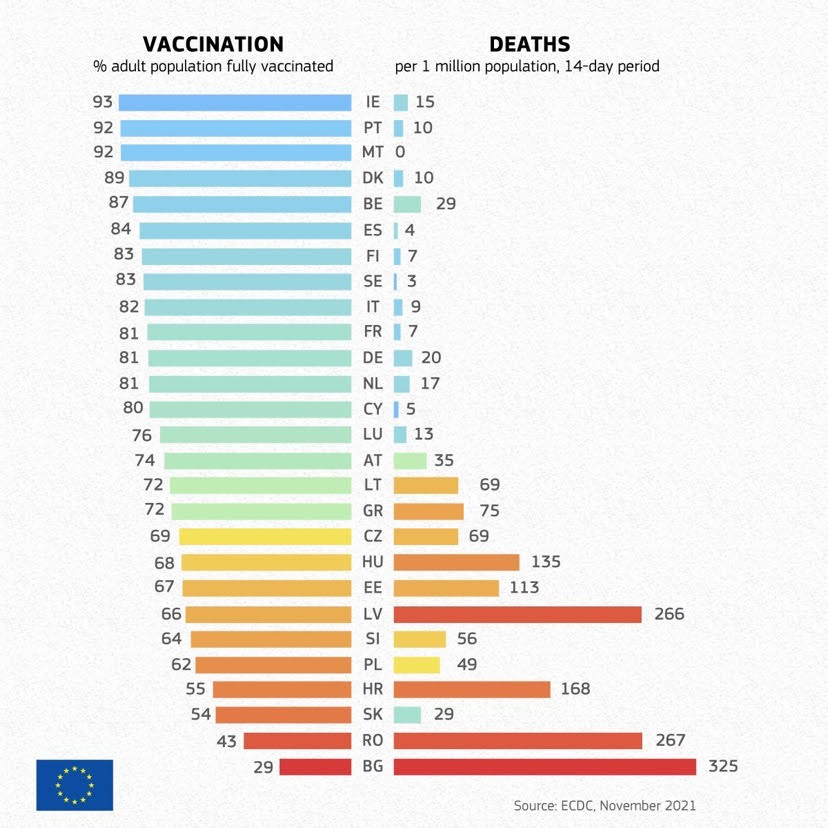

In [25]:
from IPython.display import Image
Image("eu_stats.jpeg", width=500, height=500)

In line with 14 days period outlined by the EU, we can look at the countries data and compare their deaths per million metric

In [26]:
# selecting relevant columns
df[["geoId", "deaths_per_mil"]]

geoId  deaths_per_mil
0     IS            11.0
1     NO            20.0
2     FI            23.0
3     DK            26.0
4     LI            52.0
5     PT            54.0
6     NL            58.0
7     SE            60.0
8     LU            77.0
9     IE            91.0
10    MT            93.0
11    AT           105.0
12    DE           107.0
13    BE           116.0
14    CY           139.0
15    FR           156.0
16    SI           183.0
17    IT           192.0
18    EE           268.0
19    CZ           292.0
20    SK           294.0
21    PL           307.0
22    LV           360.0
23    HR           377.0
24    LT           407.0
25    RO           598.0
26    HU           608.0
27    BG           749.0
28    ES          1598.0

Compared to the picture uploaded before we can clearly note just a few examples of huge discrepancies:

- AT: EU reports 35 deaths per million, while ECDC reports 105. This is 200% discrepancy ((105 - 35) / 35 = 2)
- HU: EU reports 135 deaths per million, while ECDC reports 608. This is 350% discrepancy
- FR: EU reports 7 deaths per million, while ECDC reports 156. This is 2128% discrepancy

I will leave you to reach your own conclusions when seeing what I outlined and browsing yourself through the data

The chart below shows:
- Vaccination rate on y-axis
- Density (P/Km2) on x-axis
- Number of deaths per million represented as the size of tickers

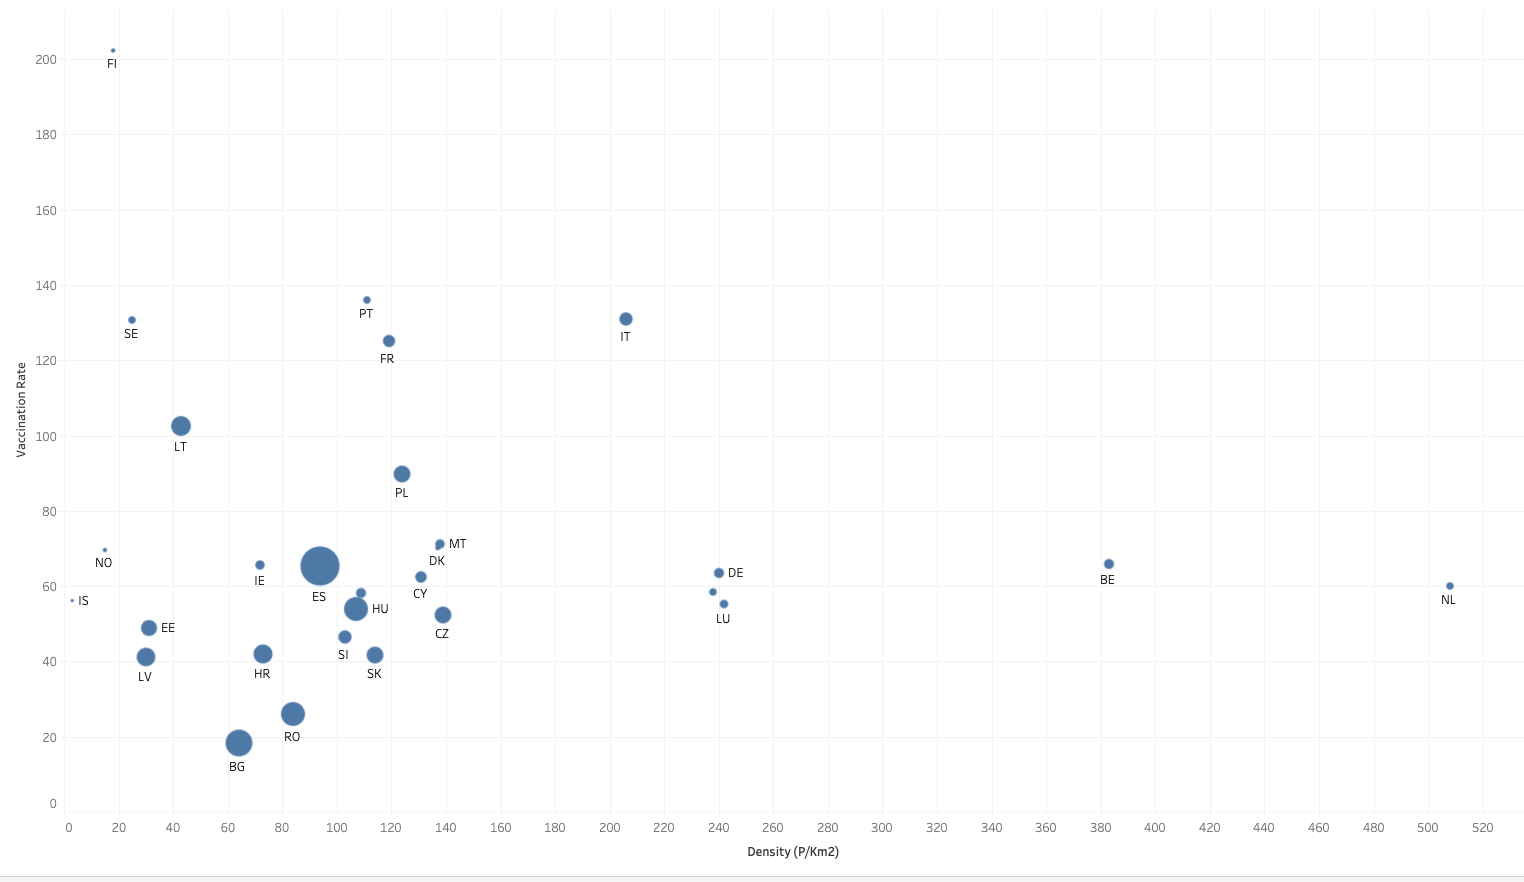

In [27]:
Image("vaccination_density.png", height=700, width=1300)

Does this seem as clear information, that vaccines prevent people from dying? I leave you to your own conclusions.

### Below couple of supplementary charts showing data stored in generated table to make digestion easier

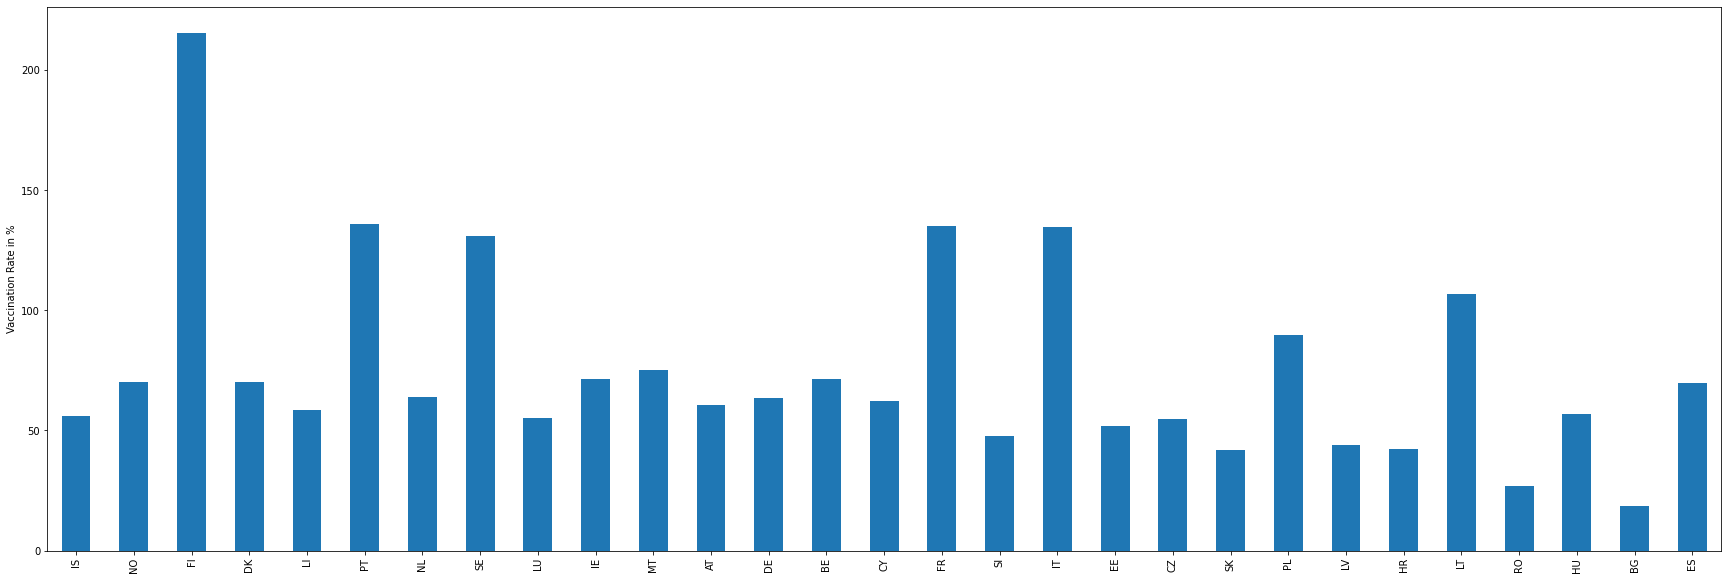

In [28]:
# plotting vaccination rate per country
# observation: 6 countries surpass 100% level
fig, ax = plt.subplots()
df['vaccination_rate'].plot(kind='bar', ax=ax)
plt.ylabel("Vaccination Rate in %")
ax.set_xticklabels(df['geoId'])
plt.show()

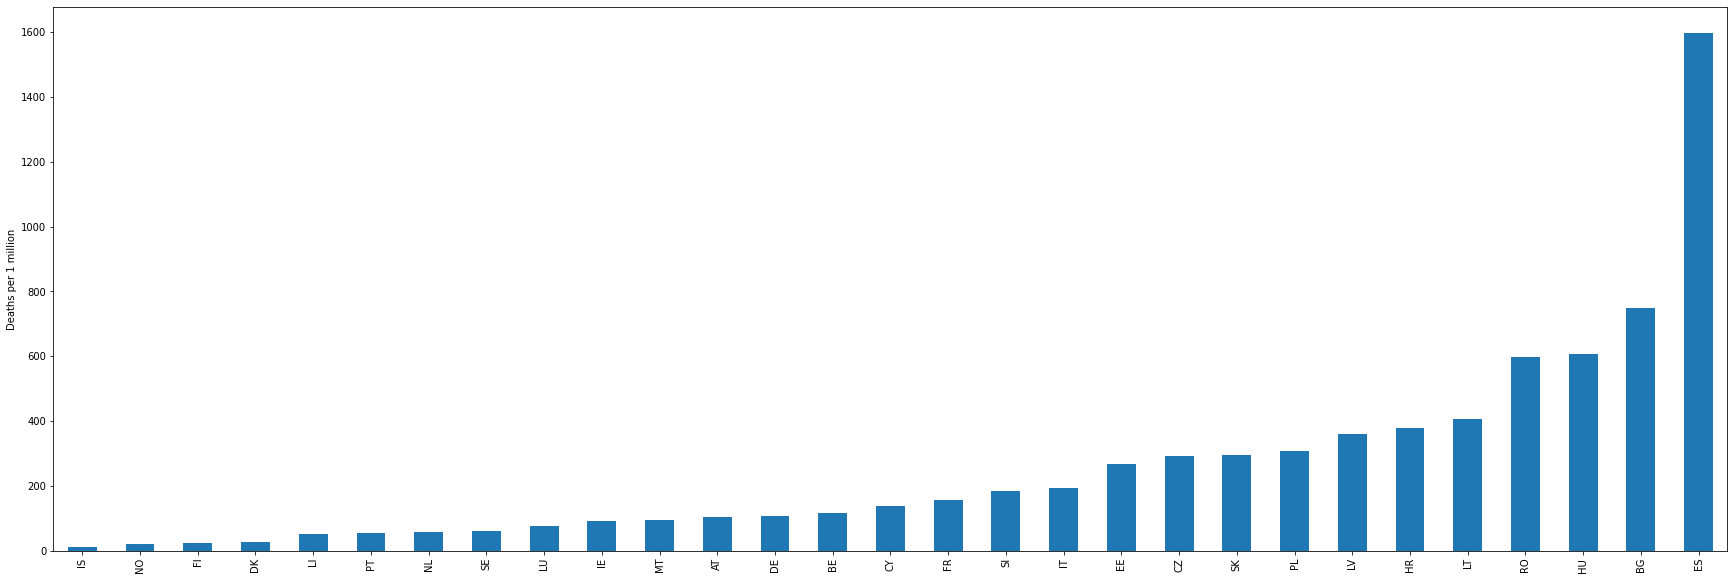

In [29]:
# plotting deaths per million data
fig, ax = plt.subplots()
df['deaths_per_mil'].plot(kind='bar', ax=ax)
plt.ylabel("Deaths per 1 million")
ax.set_xticklabels(df['geoId'])
plt.show()

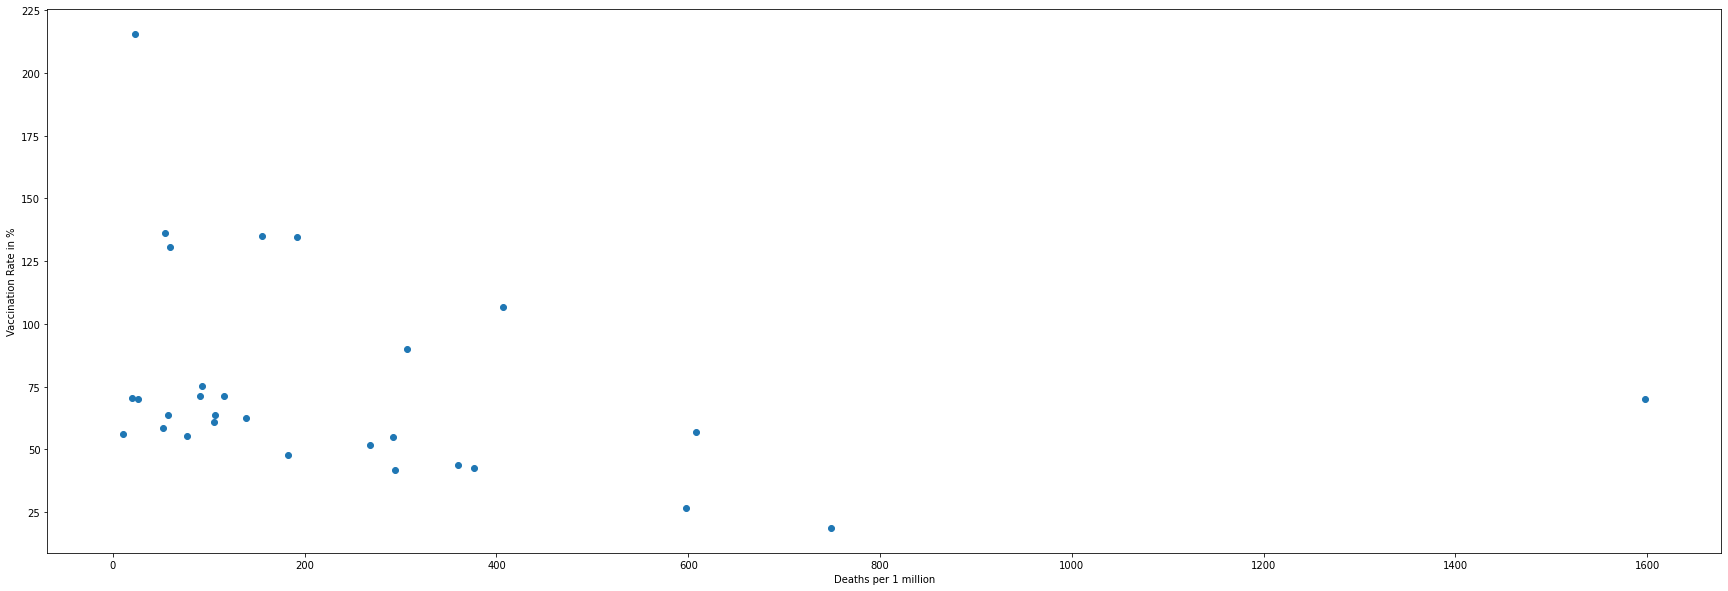

In [30]:
# plotting vaccination rate on y-axis and deaths per million on x-axis; expectation: strong correlation
# EU's claim: the higher the vaccination rate the lower the number of deaths per million 
fig, ax = plt.subplots()
plt.scatter(df["deaths_per_mil"], df["vaccination_rate"])
plt.ylabel("Vaccination Rate in %")
plt.xlabel("Deaths per 1 million")
plt.show()

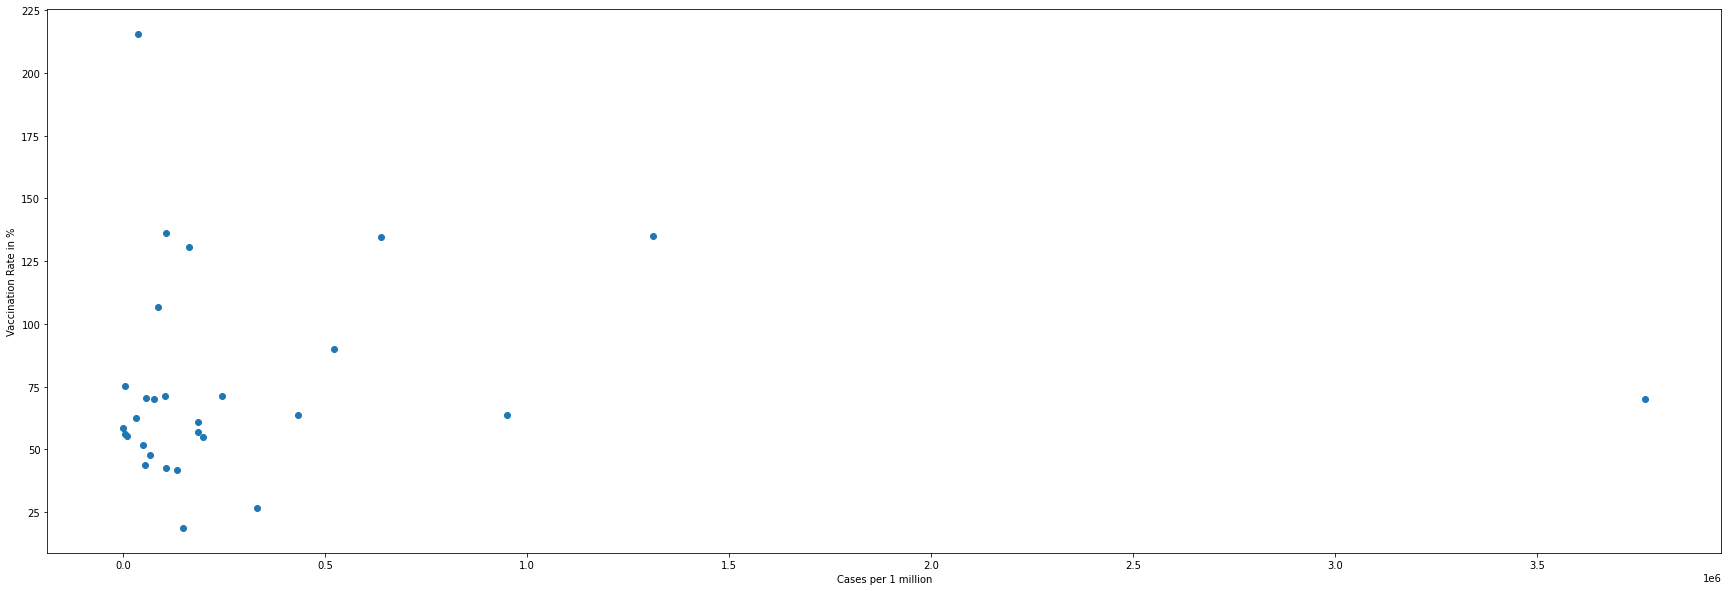

In [31]:
fig, ax = plt.subplots()
plt.scatter(df["cases"], df["vaccination_rate"])
plt.ylabel("Vaccination Rate in %")
plt.xlabel("Cases per 1 million")
plt.show()